<a href="https://colab.research.google.com/github/juma-paul/deep_learning/blob/main/Regularization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization Techniques

In [31]:
# Import necessary libraries and datasets
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


### Part 1: Warmup

#### We will start off again with the california housing dataset.

In [32]:
# Load and preprocess data
california_housing = fetch_california_housing(return_X_y=True, as_frame=True)
X, y = california_housing

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_train_unscaled, X_valid_unscaled, y_train, y_valid = train_test_split(
    X_train_unscaled, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_valid = scaler.transform(X_valid_unscaled)
X_test = scaler.transform(X_test_unscaled)

#### Question 1 (9 pts):
Recreate the regression model created in HW 3 using
tf.keras.Sequential. While you will have to use the same amount of epochs and batch
size, for the optimizer you can use RMSprop with the same learning rate as in HW 3.

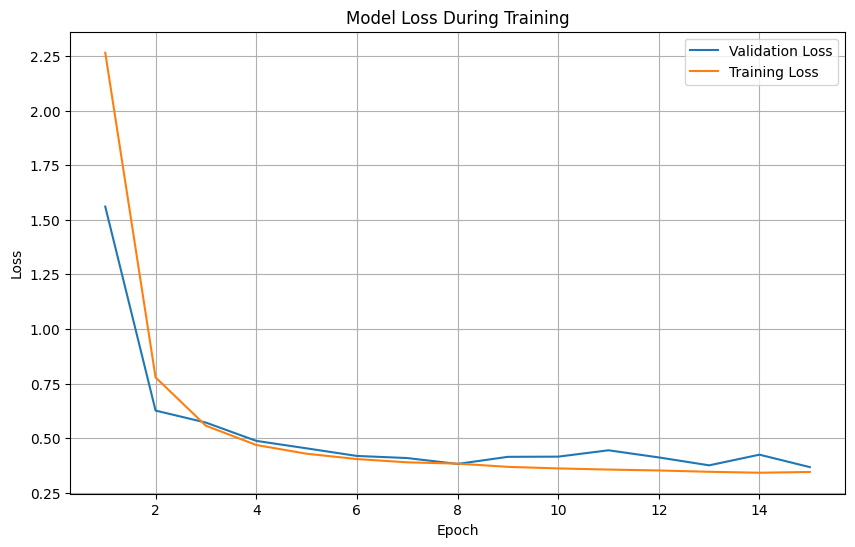

In [33]:
# Define the model with RMSprop
def q1():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mse')
    return model

model_q1 = q1()
history_q1 = model_q1.fit(
    X_train, y_train,
    epochs=15,
    batch_size=256,
    validation_data=(X_valid, y_valid),
    verbose=0
)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

val_loss = history_q1.history["val_loss"]
loss = history_q1.history["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label="Validation Loss")
plt.plot(np.arange(1, len(loss)+1), loss, label="Training Loss")
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Part 2: MNIST to Model

#### Now we shall switch to the MNIST dataset

In [34]:
# Load and preprocess MNIST
(X, y_int), _ = fashion_mnist.load_data()

X = X.astype('float32') / 255.0
X = X.reshape(X.shape[0], -1)

y = to_categorical(y_int, num_classes=10)

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train_unscaled, X_val_unscaled, y_train, y_val = train_test_split(X_train_unscaled, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

### Question 2 (9 pts):
Create a model that underfits the data after at least 50 epochs.

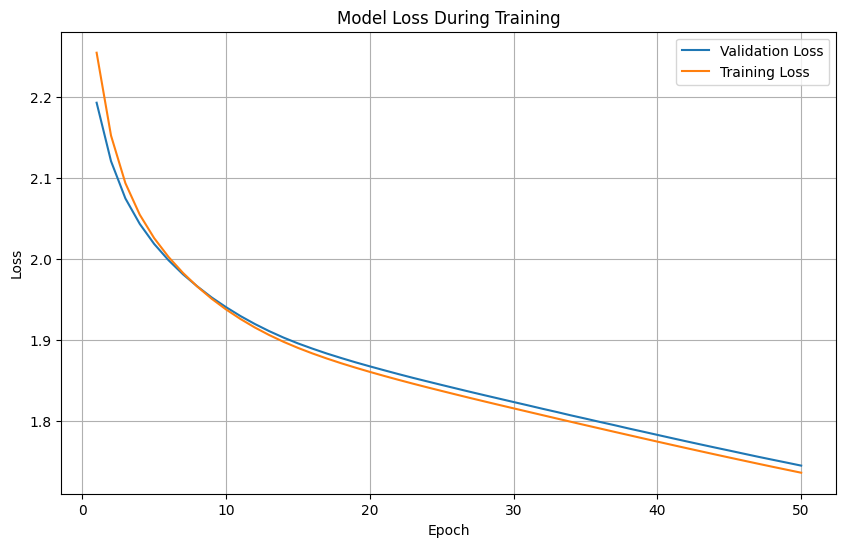

In [35]:
def q2():
  model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(2, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
  model.compile(
      optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

model_q2 = q2()
history_q2 = model_q2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=2048,
    validation_data=(X_val, y_val),
    verbose=0
)

val_loss = history_q2.history["val_loss"]
loss = history_q2.history["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label="Validation Loss")
plt.plot(np.arange(1, len(loss)+1), loss, label="Training Loss")
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

###Question 3 (9 pts):
Take the model from question 2 and change it/tweak
hyperparameters until it is able to over9t the data. The resulting model does not need to
be similar to the answer in question 2.


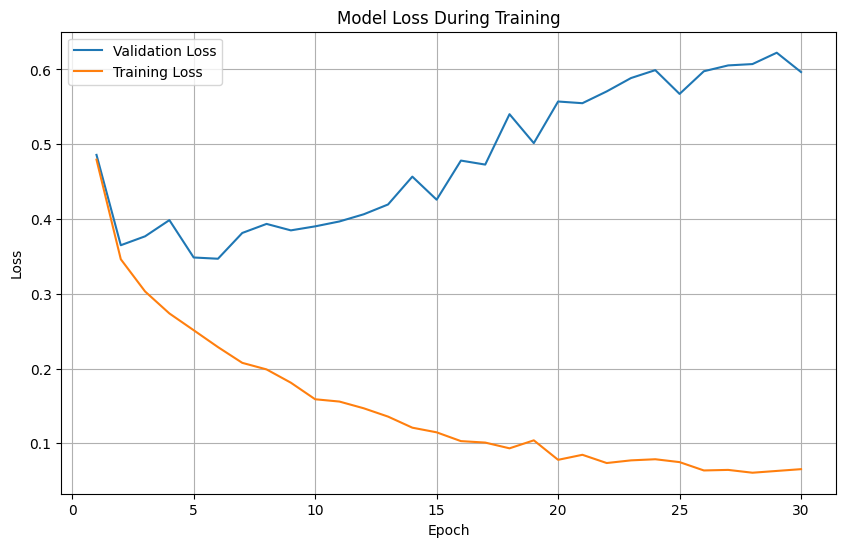

In [36]:
def q3():
  model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(512, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

model_q3 = q3()
history_q3 = model_q3.fit(
    X_train, y_train,
    epochs=30,
    batch_size=75,
    validation_data=(X_val, y_val),
    verbose=0
)

val_loss = history_q3.history["val_loss"]
loss = history_q3.history["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label="Validation Loss")
plt.plot(np.arange(1, len(loss)+1), loss, label="Training Loss")
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Question 4 (9 pts):
From your model in question 3, what do you think is the best
stopping point? Note your answer below and why you think it. Then, use keras early
stopping on your model from question 3 to have keras automatically do it for you.

**The best stopping point should be around epoch 5 or slightly earlier because beyond this point, the model will overfit.**

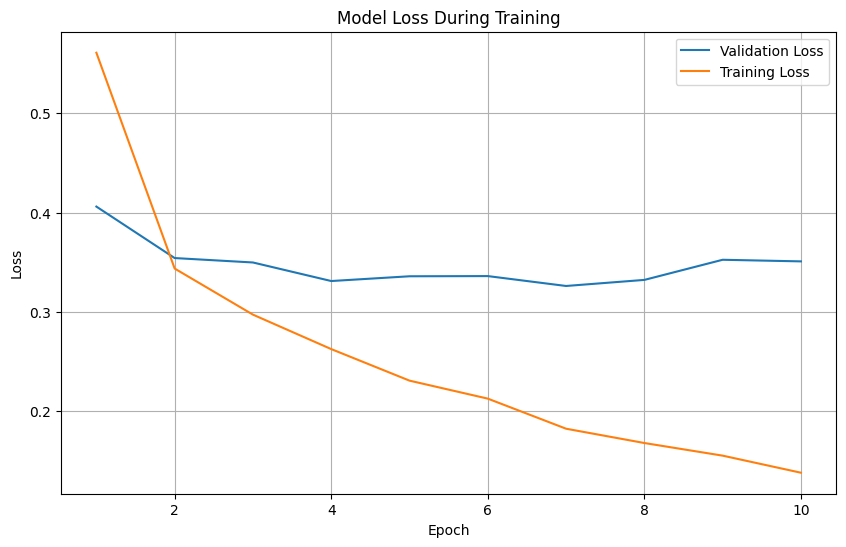

In [48]:
def q4():
  model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(512, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

model_q4 = q4()

early_stop = EarlyStopping(monitor='val_loss', patience=3)
history_q4 = model_q4.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=0)

val_loss = history_q4.history["val_loss"]
loss = history_q4.history["loss"]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label="Validation Loss")
plt.plot(np.arange(1, len(loss)+1), loss, label="Training Loss")
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

The training was halted around epoch 10 due to the patience value being set to 3. Generally, the model started overfitting right from the start, that's why there is no significant improvement.

### Question 5 (9 pts):
Starting with your model from question 3, try to regularize it by
reducing size of network. State the process you went through on how you settled on
your model.

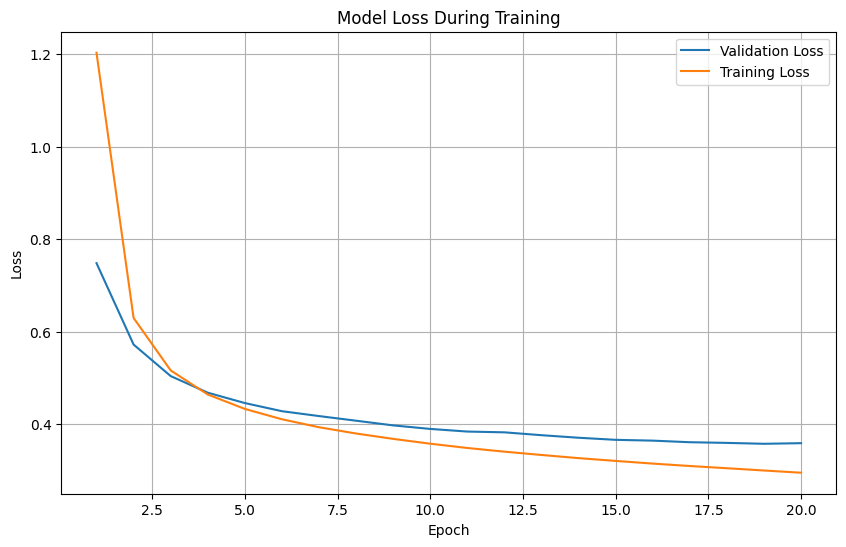

In [38]:
def q5():
  model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
  model.compile(
      optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

model_q5 = q5()
history_q5 = model_q5.fit(
    X_train, y_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_val, y_val),
    verbose=0
)

val_loss = history_q5.history["val_loss"]
loss = history_q5.history["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label="Validation Loss")
plt.plot(np.arange(1, len(loss)+1), loss, label="Training Loss")
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

- Reduce the numbeer of layers
- Reduce the number of neurons
- Increase the batch size
- Reduce the Learning rate and number of epochs
- Change the optimizer fromAdam to RMSprop

### Question 6 (9 pts):
Starting with your model from question 3, try to regularize it by using
by L1 regularization. State the process you went through on how you settled on your
model.

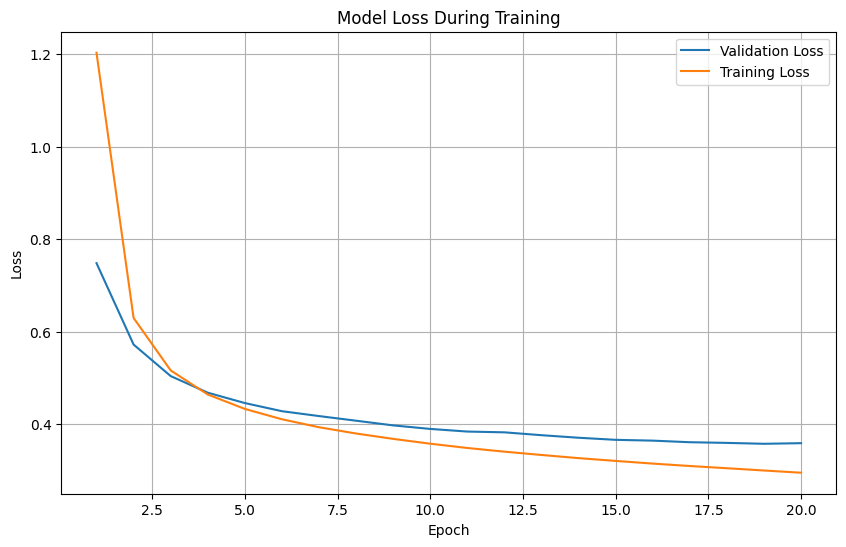

In [39]:
def q6():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(1e-4)),
        layers.Dense(200, activation='relu', kernel_regularizer=regularizers.l1(1e-4)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(1e-4)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Train the model with L1 regularization
model_q6 = q6()
history_q6 = model_q6.fit(
    X_train, y_train,
    epochs=30,
    batch_size=75,
    validation_data=(X_val, y_val),
    verbose=0
)

val_loss = history_q5.history["val_loss"]
loss = history_q5.history["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label="Validation Loss")
plt.plot(np.arange(1, len(loss)+1), loss, label="Training Loss")
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

- The model has many dense layers which can lead to overfitting
- We can apply L1 Regularization in each dense layer to make model simpler and push some weights to zero
- I tried different regularization facors and `1e-4` performed well in reducing the effects of overfitting

### Question 7 (9 pts):
Starting with your model from question 3, try to regularize it by using
L2 regularization. State the process you went through on how you settled on your
model.

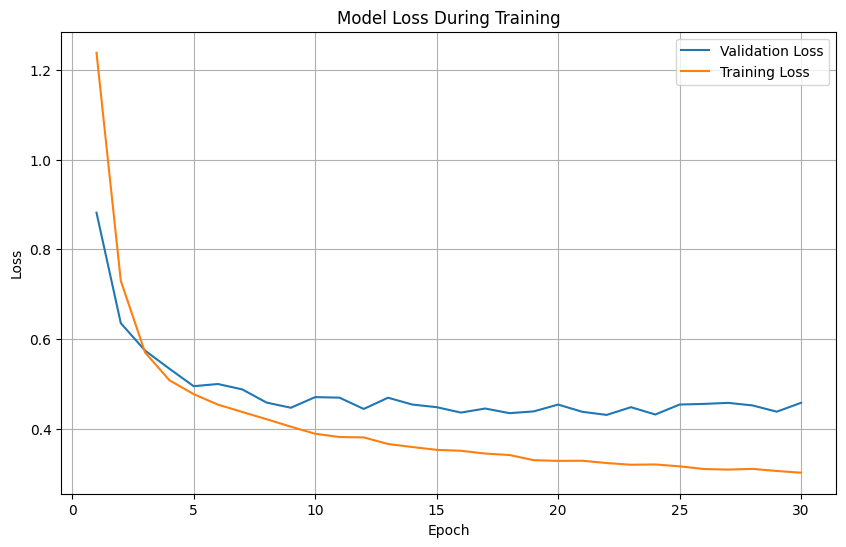

In [40]:
def q7():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
        layers.Dense(200, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
        layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model_q7 = q7()
history_q7 = model_q7.fit(
    X_train, y_train,
    epochs=30,
    batch_size=75,
    validation_data=(X_val, y_val),
    verbose=0
)

val_loss = history_q7.history["val_loss"]
loss = history_q7.history["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label="Validation Loss")
plt.plot(np.arange(1, len(loss)+1), loss, label="Training Loss")
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

- Used L2 regularization to reduce noise
- I started by setting an L2 factor of ```1e-4```, however the model was still overfitting
- After trying different values for the regularization factor of ```1e-3``` reduced overfitting better than the rest.

### Question 8 (9 pts):
Starting with your model from question 3, try to regularize it by using
dropout. State the process you went through on how you settled on your model.

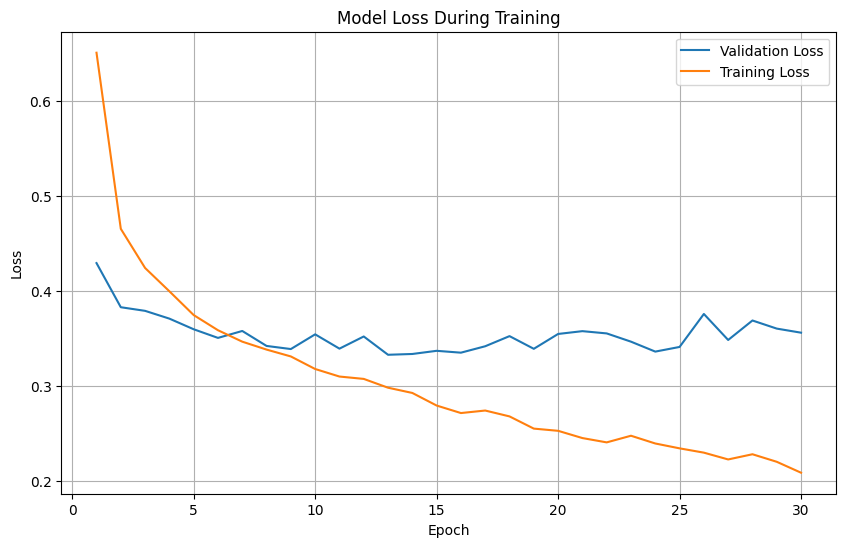

In [41]:
def q8():
  model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(200, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

model_q8 = q8()
history_q8 = model_q8.fit(
    X_train, y_train,
    epochs=30,
    batch_size=75,
    validation_data=(X_val, y_val),
    verbose=0
)

val_loss = history_q8.history["val_loss"]
loss = history_q8.history["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label="Validation Loss")
plt.plot(np.arange(1, len(loss)+1), loss, label="Training Loss")
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

- After every dense layer, except the last one, add a dropout layer
- I added added dropout layers that drop a number of neurons in the dense layer after every iteration
- I tried with different combination for dropout percentages and i settled for ```30%, 30%, & 40%```, which made significant improvements

### Question 9 (9 pts):
Starting with your model from question 3, try to regularize it by using
a combination of the methods used in questions 5-8. Make changes to
hyperparameters and have the model stop at a good epoch. State the process you went
through on how you settled on your model.

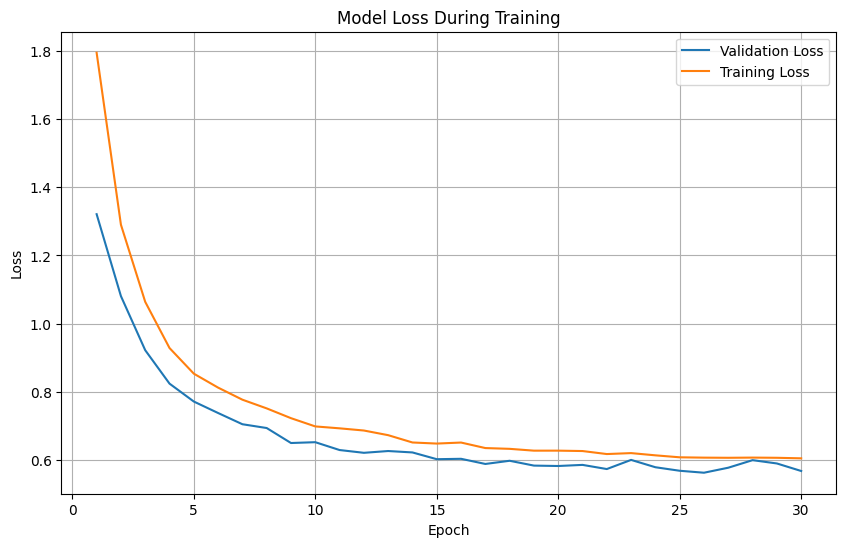

In [42]:
def q9():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model_q9 = q9()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_q9 = model_q9.fit(
    X_train, y_train,
    epochs=30,
    batch_size=75,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=0
)

val_loss = history_q9.history["val_loss"]
loss = history_q9.history["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(val_loss)+1), val_loss, label="Validation Loss")
plt.plot(np.arange(1, len(loss)+1), loss, label="Training Loss")
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

- Reduced layer sizes to 256, 128, and 64 units.
- Added dropout layers with rates of 30%, 30%, and 40%.
- Used L1 and L2 regularization with 1e-4 for both, balancing the need for sparsity and stability.
- Stopped training when validation loss did not improve for 5 epochs

### Question 10 (9 pts):
Take the models from question 2 to 9 and find their test loss.

In [52]:
models = [model_q2, model_q3, model_q4, model_q5, model_q6, model_q7, model_q8, model_q9]

test_losses = {}

for i, model in enumerate(models, start=2):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_losses[f"model_q{i}"] = loss

for model_name, loss in test_losses.items():
    print(f"{model_name} Test Loss: {loss:.4f}")

model_q2 Test Loss: 1.7491
model_q3 Test Loss: 0.7079
model_q4 Test Loss: 0.3636
model_q5 Test Loss: 0.3561
model_q6 Test Loss: 0.4900
model_q7 Test Loss: 0.4541
model_q8 Test Loss: 0.3621
model_q9 Test Loss: 0.5563


### Question 11 (10 pts):
If you had to use one of these models, which one would you use
and why?

I would use **model_q5** because it has the lowest test loss of about **0.3561** compared to the rest of the models, hence generalizes well.